In [58]:
import os
import matplotlib.pyplot as plt

In [3]:
#read in genome
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            #ignore header line with genome info
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [4]:
#create the reverse compiment string

def reverseCompliment(s):
    complement = {'A' : 'T', 'C' : 'G', 'G' : 'C', 'T' : 'A', 'N' : 'N'}
    t = ''
    for base in s:
        t = complement[base] + t #adding complement[base] first makes it go in reverse
    return t

In [5]:
#naive exact matching algorithm
def naive(p, t):
    '''p = pattern, t = text; p = read, t = genome'''
    occurences = []
    for i in range(len(t)- len(p) + 1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurences.append(i)
    return occurences

In [8]:
lambda_virus = readGenome('/home/dg/Documents/Genomic Data Science Specialization Coursers/Algorithms For DNA Sequencing/Sequences/lambda_virus.fa')

In [11]:
print(lambda_virus[:5], len(lambda_virus))

GGGCG 48502


In [27]:
#question 1
numMatched = 0
matches = naive('AGGT', lambda_virus)
matches_reverse = naive(reverseCompliment('AGGT'), lambda_virus) #adds in reverse compliment of teh read to search on the reference as well

print('%s positive and %s reverse strand matches' % (len(matches), len(matches_reverse)))

150 positive and 156 reverse strand matches


In [28]:
#question 2
numMatched = 0
matches = naive('TTAA', lambda_virus)
matches_reverse = naive(reverseCompliment('TTAA'), lambda_virus) #adds in reverse compliment of teh read to search on the reference as well

print('%s positive and %s reverse strand matches' % (len(matches), len(matches_reverse)))

195 positive and 195 reverse strand matches


In [31]:
#question 3
numMatched = 0
matches = naive('ACTAAGT', lambda_virus)
matches_reverse = naive(reverseCompliment('ACTAAGT'), lambda_virus) #adds in reverse compliment of teh read to search on the reference as well

print(matches[0], matches_reverse[0])

27733 26028


In [32]:
matches_reverse

[26028]

In [33]:
matches

[27733, 45382]

In [34]:
#question 4
numMatched = 0
matches = naive('AGTCGA', lambda_virus)
matches_reverse = naive(reverseCompliment('AGTCGA'), lambda_virus) #adds in reverse compliment of teh read to search on the reference as well

print(matches[0], matches_reverse[0])

18005 450


In [39]:
#Question 5
def naive2mm(p, t): #allows for 2 mismatches to occur
    '''p = pattern, t = text; p = read, t = genome'''
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        count_mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                count_mismatch += 1
        if count_mismatch <= 2:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [41]:
matches = naive2mm('TTCAAGCC', lambda_virus)
print(len(matches))

191


In [44]:
#Question 6
matches = naive2mm('AGGAGGTT', lambda_virus)
print(matches[0])

49


In [56]:

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() #read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

def phred33ToQ(qual):
    return ord(qual) - 33


def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*len(qualities[0])
    for qual in qualities:
        for i in range(len(qual)):
            q = phred33ToQ(qual[i])
            hist[i] += q
    return hist



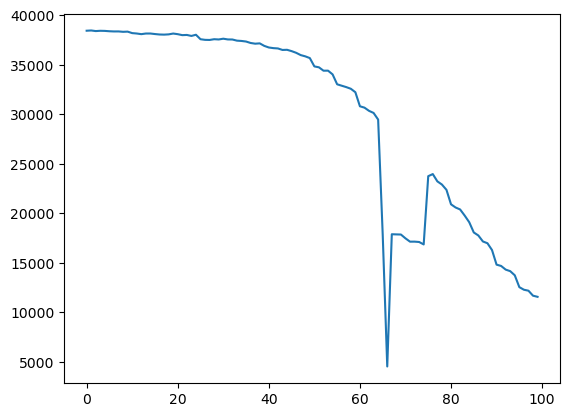

In [59]:
#Question 7
%matplotlib inline
_, quals = readFastq('/home/dg/Documents/Genomic Data Science Specialization Coursers/Algorithms For DNA Sequencing/Sequences/ERR037900_1.first1000.fastq')
qual_hist = createHist(quals)
plt.plot(range(len(qual_hist)), qual_hist)
plt.show()

In [62]:
#get the minimum number of quality reads and the location of the minimum
print(min(qual_hist), qual_hist.index(min(qual_hist)))

4526 66
